# Processing large datasets with Apache Spark and Amazon SageMaker

***This notebook runs on `Data Science 3.0 - Python 3` kernel on a `ml.t3.large` instance***.

Amazon SageMaker Processing Jobs are used  to analyze data and evaluate machine learning models on Amazon SageMaker. With Processing, you can use a simplified, managed experience on SageMaker to run your data processing workloads, such as feature engineering, data validation, model evaluation, and model interpretation. You can also use the Amazon SageMaker Processing APIs during the experimentation phase and after the code is deployed in production to evaluate performance.

        


![](https://docs.aws.amazon.com/images/sagemaker/latest/dg/images/Processing-1.png)

The preceding diagram shows how Amazon SageMaker spins up a Processing job. Amazon SageMaker takes your script, copies your data from Amazon Simple Storage Service (Amazon S3), and then pulls a processing container. The processing container image can either be an Amazon SageMaker built-in image or a custom image that you provide. The underlying infrastructure for a Processing job is fully managed by Amazon SageMaker. Cluster resources are provisioned for the duration of your job, and cleaned up when a job completes. The output of the Processing job is stored in the Amazon S3 bucket you specified.

## Our workflow for processing large amounts of data with SageMaker

We can divide our workflow into two steps:
    
1. Work with a small subset of the data with Spark running in local model in a SageMaker Studio Notebook.

1. Once we are able to work with the small subset of data we can provide the same code (as a Python script rather than a series of interactive steps) to SageMaker Processing which launched a Spark cluster, runs out code and terminates the cluster.

## In this notebook...

We will use supervised learning techniques for predictions related to our business goals. We sampled the original dataset into a small subset to be used for the project and it has been cleaned using spark nlp. 

## Business Goals

### 1. EDA: How do characteristics of Swift’s music change over time?

**Business goal:** Explore musical features of Swift’s music.

**Technical proposal:** To leverage Taylor Swift's unique music characteristics snapshot—a harmonious blend of high-energy tracks, danceable rhythms, and an infusion of joyful emotions, complemented by skillful storytelling and a versatile fusion of digital and acoustic elements. This powerful musical signature serves as a catalyst for cultivating a devoted and diverse fanbase, driving chart-topping hits, and solidifying Taylor Swift's position as a globally beloved artist across generations.

### 2. EDA: What are Swift-related Reddit comments like?

**Business goal:** Explore Reddit comments in the r/TaylorSwift subreddit.

**Technical proposal:** 
- **Flairs:** Clean the flair column so that similar flairs are converted to be the same, which will account for flairs that may be similar but not the same. Sum the count of flairs for each post. Show the top ten posts with the most common flairs. Create a wordcloud of the submissions’ flairs.
- **Authors:** Count the number of posts written by each unique Reddit author. Find the top ten authors with the most number of posts.
- **Scores:** Sum the score (upvotes minus downvotes) for each Reddit post. Find the top ten posts with the highest scores.

### 3. EDA: What does the emotion of the song look like?

**Business goal:** Explore and analyze the emotions expressed in the songs.

**Technical proposal:** To achieve this goal, we will utilize the Spotify dataset. Specifically, we will leverage the 'energy' and 'valence' variables to calculate emotional categories, allowing us to gain insights into the emotional content of Taylor Swift's songs.

### 4. NLP: How Do User Comments Reveal Language Patterns?

**Business goal:** Leverage bi-gram network analysis of user comments to gain a deeper understanding of language patterns and connections between word pairs.

**Technical proposal:** Conduct bi-gram network analysis on user comments extracted from the 'body' column of the dataset. Utilize data preprocessing, cleaning, and tokenization to prepare the text for analysis. Identify and extract significant bi-gram relationships using PySpark for efficient data processing, NLTK for text preprocessing, and NetworkX for network construction. Create visual representations to uncover intricate language connections.

### 5. NLP: How does the public feel about Swift’s music?

**Business goal:** Analyze public sentiment towards Swift’s music.

**Technical proposal:** Clean data by lemmatizing, removing stop words and special characters, and converting text data to a bag-of-words corpus using the NLTK library. Use the NLTK library to analyze the sentiment of each comment.

### 6. NLP: Analyzing Taylor's perception of emotion vs the Reddit community

**Business goal:** Generate sentiment for each album using the Spotify dataset and compare that to the sentiment generated from the comments related to posts of the same album.

**Technical proposal:** Use the Flairs dataset to group by and concatenate every comment for each album. Use Spark NLP for sentiment analysis. Merge this dataset with the external dataset (Spotify) using album names. Before merging, calculate the sentiment of each album in the Spotify dataset. Compare these two sentiments for further analysis.

### 7. NLP: How Can Cyberbullying in Taylor Swift's Online Community be Addressed to Foster a Safer and More Respectful Environment?

**Business goal:** Determine whether or not a comment constitutes cyberbullying to better understand public discourse around Taylor Swift.

**Technical proposal:** Implement the Spark NLP cyberbullying classifier to identify texts in the categories of Racism, Sexism, or Neutral.

### 8. ML: Predict if the comment is controversial or not 
**Business goal:** Predicting if the comment posted under a submission for r/TaylorSwift is controversial given its sentiment and emotion. 

**Technical proposal:** Use Spark NLP to generate sentiment and emotion. Process data, split data into training and testing sets, and use the supervised learning technique (classification) to train models. Evaluate the model's performance with metrics like accuracy, precision, and recall.

### 9. ML: Predict song popularity
**Business goal:** Focusing on Taylor Swift's music, establish a threshold based on Spotify streaming counts, integrating external and Reddit data, extracting features, labeling songs, training a classification model, evaluating performance, and enabling real-time predictions with continuous model updates for relevance.

**Technical proposal:** This project entails data collection from both Spotify API and Reddit subreddits, followed by data preprocessing and feature extraction. NER models are used to identify relevant entities in comments. The data is labeled according to the established popularity threshold, and a classification model is chosen and trained using the extracted features. Model performance is evaluated using classification metrics, and feature importance analysis is conducted.


### 10. ML: Personalized Playlist Recommendation for Taylor Swift Fans
**Business goal:** Create a personalized playlist using recommendation system analyzing user engagement and sentiments in the comments of the subreddit.

**Technical proposal:** The technical implementation of the business goal involves creating a personalized playlist recommendation system for Taylor Swift fans. It integrates collaborative filtering and content-based filtering techniques using data from both the Spotify and Reddit datasets. The process includes user profiling, feature extraction, and the development of a hybrid recommendation system for accurate and real-time suggestions. Continuous updates and a user feedback loop contribute to refining recommendations and enhancing the overall user experience within the Taylor Swift fan community on Reddit. 


## Link to external website

Website Link: https://gu-dsan6000.github.io/fall-2023-reddit-project-team-21/

## Setup
We need an available Java installation to run pyspark. The easiest way to do this is to install JDK and set the proper paths using conda

In [2]:
# Setup - Run only once per Kernel App
%conda install openjdk -y

# install PySpark
%pip install pyspark==3.2.0

# restart kernel
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
  Using cached pyspark-3.2.0-py2.py3-none-any.whl
  Using cached py4j-0.10.9.2-py2.py3-none-any.whl (198 kB)

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
  Using cached pip-23.3.1-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1


In [4]:
!pip install altair

  Using cached altair-5.2.0-py3-none-any.whl.metadata (8.7 kB)
Using cached altair-5.2.0-py3-none-any.whl (996 kB)


In [5]:
!pip install wordcloud

  Using cached wordcloud-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.3 kB)
Using cached wordcloud-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (455 kB)


## Load required libraries

In [6]:
# Pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

# General
import pandas as pd
import numpy as np
import re, string

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.colors import LinearSegmentedColormap

# Pyspark SQL
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

# Pyspark ML
from pyspark.ml.feature import HashingTF, IDF, Tokenizer, OneHotEncoder, StringIndexer, IndexToString, VectorAssembler
from pyspark.ml import Pipeline, Model
from pyspark.ml.pipeline import PipelineModel
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# sci-kit learn
from sklearn.metrics import confusion_matrix, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
pd.set_option('display.max_colwidth', None)

## Build spark session

In [8]:
spark = (
    SparkSession.builder.appName("PySparkApp")
    .config("spark.jars.packages", "org.apache.hadoop:hadoop-aws:3.2.2")
    .config(
        "fs.s3a.aws.credentials.provider",
        "com.amazonaws.auth.ContainerCredentialsProvider",
    )
    .getOrCreate()
)

print(spark.version)

:: loading settings :: url = jar:file:/opt/conda/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
org.apache.hadoop#hadoop-aws added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-074cc040-1ae6-4f5b-bd19-8fa2f78e6023;1.0
	confs: [default]
	found org.apache.hadoop#hadoop-aws;3.2.2 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.563 in central
:: resolution report :: resolve 402ms :: artifacts dl 38ms
	:: modules in use:
	com.amazonaws#aws-java-sdk-bundle;1.11.563 from central in [default]
	org.apache.hadoop#hadoop-aws;3.2.2 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	---------------------------------------------

3.2.0


In [9]:
spark

## Reading data into a Spark Dataframe

Note that we will be using the "s3a" adapter. S3A enables Hadoop to directly read and write Amazon S3 objects.

Let us read data from the s3 path where we saved the filtered data.

In [10]:
%%time

# Bucket name
bucket_name = 'cs20461'

# Path to read the entire data
s3_comments_path = f"s3a://{bucket_name}/finalProjectData/sentiment_all/part-*.snappy.parquet"

# Path to read the subset of the data
# s3_path = f"s3a://{bucket_name}/tswiftComments/ts_comm_small/part-*.snappy.parquet"

# Read all parquet files and concatenate them
ts_comm_sent = spark.read.parquet(s3_comments_path, header=True)
ts_count = ts_comm_sent.count()
print(f'Number of rows in dataset: {ts_count}')
print(f'Number of columns in dataset: {len(ts_comm_sent.columns)}')

23/12/06 17:22:05 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties


Number of rows in dataset: 1844435
Number of columns in dataset: 8
CPU times: user 8.01 ms, sys: 4.79 ms, total: 12.8 ms
Wall time: 9.43 s


Lets take a look at how the data has been structured

In [11]:
# Use the printSchema method to print the Spark DataFrame schema
ts_comm_sent.printSchema()

root
 |-- author: string (nullable = true)
 |-- document: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- emotion_class: string (nullable = true)
 |-- score: long (nullable = true)
 |-- gilded: long (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- retrieved_on: timestamp (nullable = true)



### Dataset overview


In [12]:
ts_comm_sent.show()

+--------------------+--------------------+---------+-------------+-----+------+----------------+-------------------+
|              author|            document|sentiment|emotion_class|score|gilded|controversiality|       retrieved_on|
+--------------------+--------------------+---------+-------------+-----+------+----------------+-------------------+
|           shambean2|bad blood song ca...| positive|          joy|    7|     0|               0|2022-05-15 02:30:55|
|           AdkoSokdA|     speak look good| positive|     surprise|    1|     0|               0|2022-05-15 02:30:11|
|      RedPandaLily88|imagine taylor st...| positive|         fear|   10|     0|               0|2022-05-15 02:30:10|
|       dzung_long_vn|    justice epiphany| positive|          joy|    6|     0|               0|2022-05-15 02:29:58|
|            JToews19|invite anyone sub...| positive|     surprise|    1|     0|               0|2022-05-15 02:29:56|
|   Brohamlovesrandom|story taylor real...| positive|   

# Data Quality Checks

This section will involve basic data preprocessing steps like data cleaning, munging and creation of possible features that might help in our analysis later on.

### Check for missing values

The initial step in data preprocessing involves identifying and handling missing values. Let's begin by counting the missing values and visualizing them to gain a better understanding.

In [13]:
# Calculating null and Nan values in all the columns and comparing the % to the total count of rows

# Selecting relevant columns and calculating null values
null_values_s = ts_comm_sent.select(*[
    (
        # If the data type is not boolean, timestamp, or date
        F.count(F.when((F.isnan(c) | F.col(c).isNull()), c)) 
        if t not in ("boolean", "timestamp", "date") 
        else F.count(F.when(F.col(c).isNull(), c))
    ).alias(c)
    for c, t in ts_comm_sent.dtypes if c in ts_comm_sent.columns
]).toPandas()

# Reshaping the dataframe for better visualization
null_values = pd.melt(null_values_s)

# Adding total count and percentage of null values
null_values['total_value'] = ts_count
null_values['percent_null'] = round(null_values['value'] / null_values['total_value'], 2)*100

# Sorting the DataFrame 'null_values' based on the 'percent_null' column in descending order
null_values = null_values.sort_values(by='percent_null', ascending=False)

# Displaying the sorted DataFrame
null_values

variable   value  total_value  percent_null
7      retrieved_on  223665      1844435          12.0
3     emotion_class   29018      1844435           2.0
2         sentiment   29018      1844435           2.0
1          document       0      1844435           0.0
0            author       0      1844435           0.0
4             score       0      1844435           0.0
5            gilded       0      1844435           0.0
6  controversiality       0      1844435           0.0

## Handling Missing Values in the 'retrieved_on' Column

We observed that only 12% of the values in the 'retrieved_on' column are missing. While dropping rows with missing values is a common approach, in this case, we've decided to take a different strategy due to the nature of the 'retrieved_on' column.

The 'retrieved_on' column represents a time-series, and although the missing values are relatively low, dropping them might impact the model's performance. Our business goal involves building a classification model, and for this specific task, the 'retrieved_on' column is not required.

Instead of dropping rows with missing values, we have opted to drop the entire 'retrieved_on' column from our dataset. This decision is based on the understanding that this time-series information is not essential for the initial classification model.

It's worth noting that we plan to retain the 'retrieved_on' column for future analysis. After making predictions with our model, we can join the results with the 'retrieved_on' column to obtain a timely trend based on the predictions. This approach allows us to leverage the time-series data for post-modeling analysis without affecting the current classification task.


In [14]:
# Creating a new DataFrame without the "retrieved_on" column
ts_comm = ts_comm_sent.drop("retrieved_on")

# Displaying the schema of the new DataFrame
ts_comm.printSchema()

root
 |-- author: string (nullable = true)
 |-- document: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- emotion_class: string (nullable = true)
 |-- score: long (nullable = true)
 |-- gilded: long (nullable = true)
 |-- controversiality: long (nullable = true)



In [15]:
ts_comm.show()

+--------------------+--------------------+---------+-------------+-----+------+----------------+
|              author|            document|sentiment|emotion_class|score|gilded|controversiality|
+--------------------+--------------------+---------+-------------+-----+------+----------------+
|           shambean2|bad blood song ca...| positive|          joy|    7|     0|               0|
|           AdkoSokdA|     speak look good| positive|     surprise|    1|     0|               0|
|      RedPandaLily88|imagine taylor st...| positive|         fear|   10|     0|               0|
|       dzung_long_vn|    justice epiphany| positive|          joy|    6|     0|               0|
|            JToews19|invite anyone sub...| positive|     surprise|    1|     0|               0|
|   Brohamlovesrandom|story taylor real...| positive|          joy|    2|     0|               0|
|      songacronymbot|yntcd refer need ...| positive|      sadness|    1|     0|               0|
|       cruelsummer3

## Handling Missing Values in 'sentiment' and 'emotion_class' Columns

We have observed that approximately 2% of the values in the 'sentiment' and 'emotion_class' columns are missing. Considering the small percentage of missing values, dropping these rows is unlikely to have a significant impact on the overall dataset. Moreover, it is important to note that when both the 'sentiment' and 'emotion_class' for a comment are null, it indicates that there was likely no comment in the beginning. This resulted in null values being generated by the Spark NLP pipeline.

Given these considerations, we have decided not to drop the rows with missing values in these columns. Retaining these instances allows us to maintain the integrity of the dataset and avoids potential loss of information. In the context of our analysis, the impact of these missing values is deemed negligible, and their presence does not compromise the quality of the dataset for our specific goals.


In [16]:
ts_comm = ts_comm.filter(~(F.col('sentiment').isNull() | F.col('emotion_class').isNull()))

In [17]:
# Calculating null and Nan values in all the columns and comparing the % to the total count of rows

# Selecting relevant columns and calculating null values
null_values_new = ts_comm.select(*[
    (
        # If the data type is not boolean, timestamp, or date
        F.count(F.when((F.isnan(c) | F.col(c).isNull()), c)) 
        if t not in ("boolean", "timestamp", "date") 
        else F.count(F.when(F.col(c).isNull(), c))
    ).alias(c)
    for c, t in ts_comm.dtypes if c in ts_comm.columns
]).toPandas()

# Reshaping the dataframe for better visualization
null_values_latest = pd.melt(null_values_new)

# Adding total count and percentage of null values
null_values_latest['total_value'] = ts_comm.count()
null_values_latest['percent_null'] = round(null_values_latest['value'] / null_values_latest['total_value'], 2)*100

# Sorting the DataFrame 'null_values_latest' based on the 'percent_null' column in descending order
null_values_latest = null_values_latest.sort_values(by='percent_null', ascending=False)

# Displaying the sorted DataFrame
null_values_latest

variable  value  total_value  percent_null
0            author      0      1815417           0.0
1          document      0      1815417           0.0
2         sentiment      0      1815417           0.0
3     emotion_class      0      1815417           0.0
4             score      0      1815417           0.0
5            gilded      0      1815417           0.0
6  controversiality      0      1815417           0.0

Now that we have handled missing data and we have the cleaned text as well, lets check if the labels are fairly balanced or not.

In [18]:
ts_comm.groupBy("controversiality").agg(F.count("controversiality").alias('Count')).show()

+----------------+-------+
|controversiality|  Count|
+----------------+-------+
|               0|1787032|
|               1|  28385|
+----------------+-------+



## Balancing the Target Variable through Downsampling

In addressing the imbalance of the target variable ('controversiality'), we have opted for the downsampling technique. While downsampling may introduce the drawback of information loss, the substantial size of the dataset allows us to mitigate this concern.

By downsampling the majority class to align with the count of the minority class, we aim to achieve a balanced distribution of labels. This process will result in approximately 28,000 rows, which we deem sufficient for training the model. Despite the inherent trade-off of losing some information, this approach enables us to create a more balanced and representative training set for our classification model.


In [19]:
# Count the number of instances in each class
majority_count = ts_comm.filter(F.col("controversiality") == 0).count()
minority_count = ts_comm.filter(F.col("controversiality") == 1).count()

# Downsample the majority class to match the minority class count
downsampled_majority = ts_comm.filter(F.col("controversiality") == 0).sample(False, minority_count / majority_count, seed=42)

# Combine the downsampled majority class with the minority class
downsampled_ts_comm = downsampled_majority.union(ts_comm.filter(F.col("controversiality") == 1))

# Shuffle the downsampled data to mix the classes
downsampled_ts_comm = downsampled_ts_comm.orderBy('controversiality', F.rand())

# Change label values
downsampled_ts_comm = downsampled_ts_comm.withColumn(
    "controversiality",
    F.when(downsampled_ts_comm["controversiality"] == 0, "No").otherwise("Yes")
)

# Show the counts after downsampling
downsampled_ts_comm.groupBy("controversiality").count().show()

+----------------+-----+
|controversiality|count|
+----------------+-----+
|              No|28504|
|             Yes|28385|
+----------------+-----+



In [20]:
print(f'Number of rows in downsampled dataset: {downsampled_ts_comm.count()}')

Number of rows in downsampled dataset: 56889


In [21]:
# SANITY CHECK
downsampled_ts_comm.printSchema()

root
 |-- author: string (nullable = true)
 |-- document: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- emotion_class: string (nullable = true)
 |-- score: long (nullable = true)
 |-- gilded: long (nullable = true)
 |-- controversiality: string (nullable = false)



## Split the data

In [22]:
# Split the data
train_data, test_data = downsampled_ts_comm.randomSplit([0.8, 0.2], seed=42)

## Data Transformation: Preparing for Model Training
In this section, we perform essential transformations on our dataset to prepare it for training classification models. The following key transformations are applied:

**1. Text Data Tokenization and Vectorization:**

We employ a two-step process to convert the textual information in the 'document' column into a format suitable for machine learning models:

 - Tokenization: Using the Tokenizer module, we split each comment into individual words, creating a list of tokens.
 - HashingTF and IDF: The tokenized words are then transformed into numerical feature vectors using the HashingTF (Term Frequency) and IDF (Inverse Document Frequency) techniques. This process helps represent the comments in a numerical format while considering the importance of each word.
 
**2. Encoding Categorical Variables:**
Certain categorical variables ('sentiment', 'emotion_class') are converted into numerical representations using the following techniques:

- StringIndexer: Converts categorical labels into indices for 'sentiment', 'emotion_class', and 'controversiality'.
- One-Hot Encoding: Transforms the indexed categorical variables into binary vectors to ensure compatibility with machine learning algorithms.

**3. Feature Selection:**
The relevant features for model training are assembled into a single vector using the VectorAssembler module. This includes the transformed text features, one-hot encoded categorical features, and additional features like 'gilded'. The resulting vector, named 'final_features,' serves as the input for our classification models.

**4. Label Conversion:**
Lastly, we use the IndexToString module to convert the predicted indices into human-readable labels. This is particularly useful for interpreting the model outputs in terms of controversiality categories: 'Not Controversial' or 'Controversial.'

By executing these transformations, we create a well-structured and feature-rich dataset, laying the foundation for effective training and evaluation of our classification models.

In [23]:
# Tokenize the 'document' column
tokenizer = Tokenizer(inputCol="document", outputCol="words")

# Apply HashingTF to convert words to feature vectors
hashing_tf = HashingTF(inputCol="words", outputCol="raw_features", numFeatures=20)

# Apply IDF to the output of HashingTF
idf = IDF(inputCol="raw_features", outputCol="features")

# StringIndexer for fitting in our pipeline for all of the string data into indices 
sentiment_indexer = StringIndexer(inputCol="sentiment", outputCol="sentiment_index")
emotion_indexer = StringIndexer(inputCol="emotion_class", outputCol="emotion_index")
controversiality_indexer = StringIndexer(inputCol="controversiality", outputCol="is_contro_idx")

# One Hot encoding for categorical values having more tha 2 categories
onehot_sentiment = OneHotEncoder(inputCols=["sentiment_index"], outputCols=["sentiment_class_vec"])
onehot_emotion = OneHotEncoder(inputCol="emotion_index", outputCol="emotion_class_vec")

# Picking features for models
vectorAssembler_features = VectorAssembler(
    inputCols=["features", "sentiment_class_vec","emotion_class_vec",\
               "gilded"], 
    outputCol= "final_features")

# Giving our predicted indices a label
labelConverter = IndexToString(inputCol="prediction", 
                               outputCol="predicted_controversiality", 
                               labels= ["Not Controversial","Controversial"])

## Classification: Predicting Controversial Comments
In pursuit of our primary machine learning business goal, we embark on a supervised learning journey to predict whether a given comment is controversial or not. This classification task involves several key steps:

**1. Model Selection:**
We explore a variety of classification models, each with its unique strengths. The models considered for this task include Logistic Regression, Decision Trees, and Random Forest. This diversity allows us to assess different aspects of the data and identify the model that best captures the underlying patterns.

**2. Hyperparameter Tuning:**
Fine-tuning model hyperparameters is a critical step to enhance predictive performance and generalization. We systematically optimize the configuration of each model to ensure optimal results.

**3. Cross-Validation:**
To obtain robust performance estimates, we employ cross-validation techniques. This involves splitting the dataset into multiple folds, training the models on different subsets, and evaluating their performance. This iterative process provides a more reliable indication of a model's effectiveness.

**4. Evaluation Metrics:**
The success of our models is assessed using a range of metrics, including accuracy, precision, recall, and F1-score. These metrics provide a comprehensive understanding of the models' performance, helping us compare and select the most suitable model for our specific classification task.

By iteratively refining our models and leveraging hyperparameter optimization, we aim to deliver a robust and accurate classification model capable of discerning controversial comments within the dataset.



## Logistic Regression

In [ ]:
# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="is_contro_idx", featuresCol="final_features")

# Creating a pipeline
pipeline_lr = Pipeline(stages=[tokenizer, hashing_tf, idf, sentiment_indexer, emotion_indexer, controversiality_indexer,\
                               onehot_sentiment, onehot_emotion,\
                               vectorAssembler_features, \
                               lr, labelConverter])

# Create ParamGrid for Hyper parameter tuning
lr_param_grid = ParamGridBuilder()\
             .addGrid(lr.regParam, [0.01, 0.1, 0.5])\
             .addGrid(lr.elasticNetParam, [0.25, 0.5, 0.75])\
             .addGrid(lr.maxIter, [5, 10, 20])\
             .build()

# Evaluate model
lr_evaluator = BinaryClassificationEvaluator().setLabelCol("is_contro_idx")

# Create 5-fold CrossValidator
lr_cv = CrossValidator(estimator = pipeline_lr,
                    estimatorParamMaps = lr_param_grid,
                    evaluator = lr_evaluator,
                    numFolds = 5)

# Run cross validations
lr_cv_model = lr_cv.fit(train_data)

# Use test set here so we can measure the accuracy of our model on new data
lr_preds = lr_cv_model.transform(test_data)

# Evaluate best model
# lr_cv_model uses the best model found from the Cross Validation

# Accuracy
lr_acc = lr_evaluator.evaluate(lr_preds)

rf_preds = lr_preds.withColumn("is_contro_idx", lr_preds["is_contro_idx"].cast("double"))
tp = lr_preds.filter((F.col("is_contro_idx") == 1) & (F.col("prediction") == 1)).count()
fp = lr_preds.filter((F.col("is_contro_idx") == 0) & (F.col("prediction") == 1)).count()
fn = lr_preds.filter((F.col("is_contro_idx") == 1) & (F.col("prediction") == 0)).count()

# Precision
precision = tp / (tp + fp)
# Recall
recall = tp / (tp + fn)
# Calculate F1 score
f1_score_lr = 2 * (precision * recall) / (precision + recall)

# Displaying the results
print()
print("===================")
print("Accuracy = %g" % lr_acc)
print("Test Error = %g" % (1.0 - lr_acc))
print("F1 Score = %g" % f1_score_lr)
print("===================")
print()


Accuracy = 0.631776
Test Error = 0.368224
F1 Score = 0.59322



### Confusion Matrix
**Defining a custom color mapping for our confusion matrix as per the theme of the website**

In [27]:
# Custom color scale for the heatmap
custom_colorscale = [
    [0.0, '#dedcf1'],  
    [0.125, '#cfcae1'], 
    [0.25, '#c2bbd2'],  
    [0.375, '#b5abc4'], 
    [0.5, '#aa9eb7'],  
    [0.625, '#9e90ab'], 
    [0.75, '#8b7995'],  
    [0.875, '#755f7d'], 
    [1.0, '#563c5c']  
]

# Create a LinearSegmentedColormap from the custom color scale
custom_cmap = LinearSegmentedColormap.from_list("custom", custom_colorscale)

Confusion Matrix:
[[3290 2250]
 [2310 3325]]


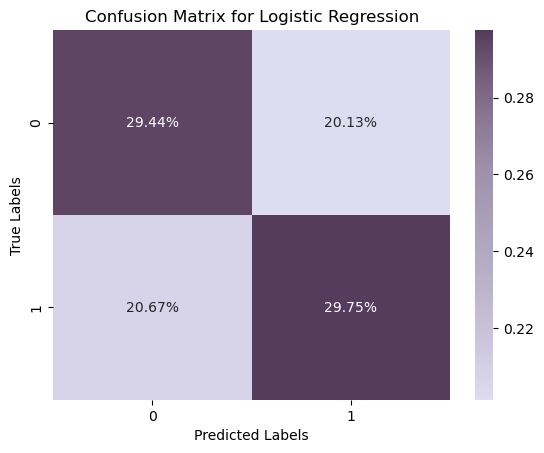

In [28]:
# y_pred has the predicted labels
y_pred_lr = lr_preds.select("prediction").collect()

# y_orig are the actual labels 
y_orig_lr = lr_preds.select("is_contro_idx").collect()


# Creating the confusion matrix 
cm_lr = confusion_matrix(y_orig_lr, y_pred_lr)
print("Confusion Matrix:")
print(cm_lr)

cm_lr_heatmap = sns.heatmap(cm_lr/np.sum(cm_lr), annot=True, fmt='.2%', cmap=custom_cmap)

# Set title, x-axis label, and y-axis label
cm_lr_heatmap.set_title("Confusion Matrix for Logistic Regression")
cm_lr_heatmap.set_xlabel("Predicted Labels")
cm_lr_heatmap.set_ylabel("True Labels")

# Save the figure
#plt.savefig("../../plots/lr_model_1_confusion_matrix.png")

# Display the plot
plt.show()

### ROC Curve

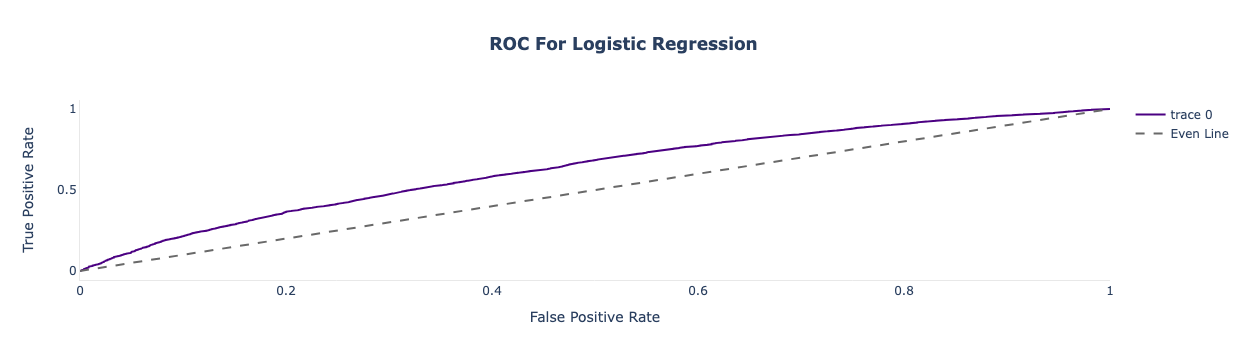

In [31]:
# Obtain the probability column for the positive class 
lr_probabilities = lr_preds.select("probability").rdd.map(lambda x: x[0][1])

# Convert Spark RDD to a numpy array
y_true = np.array([int(row.is_contro_idx) for row in lr_preds.collect()])
y_scores = np.array(lr_probabilities.collect())

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve 
roc_curve_trace = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    line=dict(color='#4B0082')
)

# Add an even line 
even_line_trace = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(color='#696969', dash='dash'),
    name='Even Line'
)

# Layout of the plot
layout = go.Layout(
    title="<b>ROC For Logistic Regression</b>",
    title_x=0.5,
    xaxis=dict(title="False Positive Rate"),
    yaxis=dict(title="True Positive Rate"),
)

# Set the background color to white
layout.plot_bgcolor = 'white'

# Add axis lines
layout.xaxis.showline = True
layout.xaxis.linewidth = 1
layout.xaxis.linecolor = '#E8E8E8'
layout.yaxis.showline = True
layout.yaxis.linewidth = 1
layout.yaxis.linecolor = '#E8E8E8'

fig = go.Figure(data=[roc_curve_trace, even_line_trace], layout=layout)

# Save the plot as an HTML file
#fig.write_html("../../plots/lr_model_1_roc.html")

# Display the figure
fig.show()

## Decision Trees

In [32]:
# Create initial DecisionTreeClassifier model
dt = DecisionTreeClassifier(labelCol="is_contro_idx", featuresCol="final_features", leafCol="leafId")

# Creating a pipeline
pipeline_dt = Pipeline(stages=[tokenizer, hashing_tf, idf, sentiment_indexer, emotion_indexer, controversiality_indexer,\
                               onehot_sentiment, onehot_emotion,\
                               vectorAssembler_features, \
                               dt, labelConverter])

# Create ParamGrid for Decision Tree hyperparameter tuning
dt_param_grid = ParamGridBuilder()\
    .addGrid(dt.maxDepth, [3, 5, 7])\
    .addGrid(dt.maxBins, [20, 40, 60])\
    .addGrid(dt.impurity, ['gini', 'entropy'])\
    .build()

# Evaluate Decision Tree model
dt_evaluator = BinaryClassificationEvaluator().setLabelCol("is_contro_idx")

# Create 5-fold CrossValidator for Decision Tree
dt_cv = CrossValidator(estimator=pipeline_dt,
                      estimatorParamMaps=dt_param_grid,
                      evaluator=dt_evaluator,
                      numFolds=5)

# Fit the Decision Tree model using cross-validation
dt_cv_model = dt_cv.fit(train_data)

# Use test set here so we can measure the accuracy of our model on new data
dt_preds = dt_cv_model.transform(test_data)

# Evaluate best model
# dt_cv_model uses the best model found from the Cross Validation

# Accuracy
dt_acc = dt_evaluator.evaluate(dt_preds)

dt_preds = dt_preds.withColumn("is_contro_idx", dt_preds["is_contro_idx"].cast("double"))
tp = dt_preds.filter((F.col("is_contro_idx") == 1) & (F.col("prediction") == 1)).count()
fp = dt_preds.filter((F.col("is_contro_idx") == 0) & (F.col("prediction") == 1)).count()
fn = dt_preds.filter((F.col("is_contro_idx") == 1) & (F.col("prediction") == 0)).count()

# Precision
precision = tp / (tp + fp)
# Recall
recall = tp / (tp + fn)
# Calculate F1 score
f1_score_dt = 2 * (precision * recall) / (precision + recall)

# Displaying the results
print()
print("===================")
print("Accuracy = %g" % dt_acc)
print("Test Error = %g" % (1.0 - dt_acc))
print("F1 Score = %g" % f1_score_dt)  
print("===================")
print()


Accuracy = 0.485504
Test Error = 0.514496
F1 Score = 0.625427



### Confusion matrix

Confusion Matrix:
[[2131 3409]
 [1520 4115]]


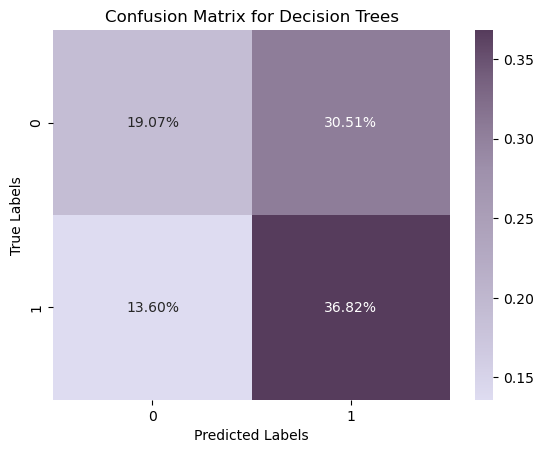

In [33]:
# y_pred has the predicted labels
y_pred_dt = dt_preds.select("prediction").collect()

# y_orig are the actual labels 
y_orig_dt = dt_preds.select("is_contro_idx").collect()

# Creating the confusion matrix 
cm_dt = confusion_matrix(y_orig_dt, y_pred_dt)
print("Confusion Matrix:")
print(cm_dt)

cm_dt_heatmap = sns.heatmap(cm_dt/np.sum(cm_dt), annot=True, fmt='.2%', cmap=custom_cmap)

# Set title, x-axis label, and y-axis label
cm_dt_heatmap.set_title("Confusion Matrix for Decision Trees")
cm_dt_heatmap.set_xlabel("Predicted Labels")
cm_dt_heatmap.set_ylabel("True Labels")

# Save the figure
#plt.savefig("../../plots/dt_model_1_confusion_matrix.png")

# Display the plot
plt.show()

### ROC Curve

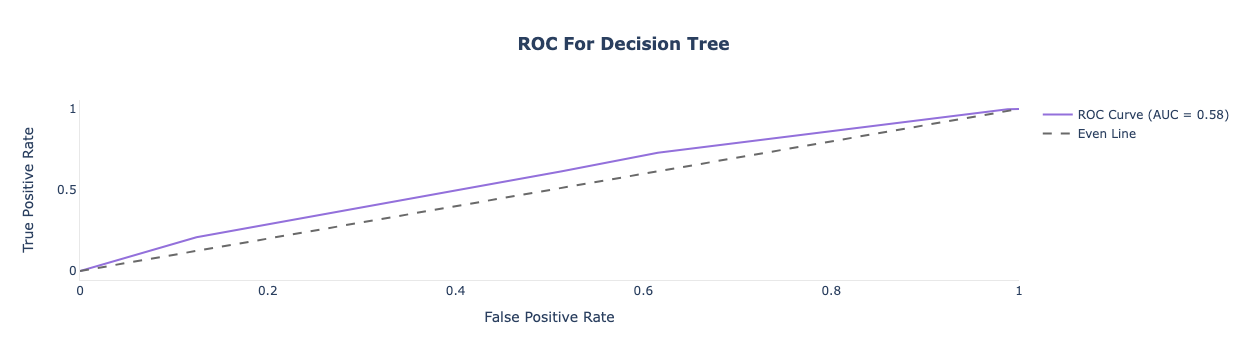

In [34]:
# Obtain the probability column 
dt_probabilities = dt_preds.select("probability").rdd.map(lambda x: x[0][1])

# Convert Spark RDD to a numpy array
y_true = np.array([int(row.is_contro_idx) for row in dt_preds.collect()])
y_scores = np.array(dt_probabilities.collect())

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using Plotly
roc_curve_trace = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC Curve (AUC = {roc_auc:.2f})',
    line=dict(color='#9370DB')
)

even_line_trace = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(color='#696969', dash='dash'),
    name='Even Line'
)

# Layout of the plot
layout = go.Layout(
    title="<b>ROC For Decision Tree</b>",
    title_x=0.5,
    xaxis=dict(title="False Positive Rate"),
    yaxis=dict(title="True Positive Rate"),
)

# Set the background color to white
layout.plot_bgcolor = 'white'

# Add axis lines
layout.xaxis.showline = True
layout.xaxis.linewidth = 1
layout.xaxis.linecolor = '#E8E8E8'
layout.yaxis.showline = True
layout.yaxis.linewidth = 1
layout.yaxis.linecolor = '#E8E8E8'

fig = go.Figure(data=[roc_curve_trace, even_line_trace], layout=layout)

# Save the plot as an HTML file
#fig.write_html("../../plots/dt_model_1_roc.html")

# Display the figure
fig.show()

## Random Forest

In [35]:
# Intialising RandomForestClassifier model
rf = RandomForestClassifier(labelCol="is_contro_idx", featuresCol="final_features")

# Creating a pipeline
pipeline_rf = Pipeline(stages=[tokenizer, hashing_tf, idf, sentiment_indexer, emotion_indexer, controversiality_indexer,\
                               onehot_sentiment, onehot_emotion,\
                               vectorAssembler_features, \
                               rf, labelConverter])

# Create ParamGrid for Random Forest hyperparameter tuning
rf_param_grid = ParamGridBuilder()\
    .addGrid(rf.maxDepth, [5, 10])\
    .addGrid(rf.numTrees, [50, 100])\
    .addGrid(rf.featureSubsetStrategy, ['auto', 'sqrt'])\
    .build()

# Evaluate model
rf_evaluator = BinaryClassificationEvaluator().setLabelCol("is_contro_idx")

# Create 5-fold CrossValidator
rf_cv = CrossValidator(estimator = pipeline_rf,
                    estimatorParamMaps = rf_param_grid,
                    evaluator = rf_evaluator,
                    numFolds = 5)

# Run cross validations
rf_cv_model = rf_cv.fit(train_data)

# Use test set here so we can measure the accuracy of our model on new data
rf_preds = rf_cv_model.transform(test_data)

# Evaluate best model
# rf_cv_model uses the best model found from the Cross Validation

# Accuracy
rf_acc = rf_evaluator.evaluate(rf_preds)

rf_preds = rf_preds.withColumn("is_contro_idx", rf_preds["is_contro_idx"].cast("double"))
tp = rf_preds.filter((F.col("is_contro_idx") == 1) & (F.col("prediction") == 1)).count()
fp = rf_preds.filter((F.col("is_contro_idx") == 0) & (F.col("prediction") == 1)).count()
fn = rf_preds.filter((F.col("is_contro_idx") == 1) & (F.col("prediction") == 0)).count()

# Precision
precision = tp / (tp + fp)
# Recall
recall = tp / (tp + fn)
# Calculate F1 score
f1_score_rf = 2 * (precision * recall) / (precision + recall)

# Displaying the results
print()
print("===================")
print("Accuracy = %g" % rf_acc)
print("Test Error = %g" % (1.0 - rf_acc))
print("F1 Score = %g" % f1_score_rf) 
print("===================")
print()

23/12/06 18:09:30 WARN DAGScheduler: Broadcasting large task binary with size 1640.4 KiB
23/12/06 18:09:31 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
23/12/06 18:09:34 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
23/12/06 18:09:37 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
23/12/06 18:09:46 WARN DAGScheduler: Broadcasting large task binary with size 1640.4 KiB
23/12/06 18:09:47 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
23/12/06 18:09:50 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
23/12/06 18:09:53 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
23/12/06 18:10:01 WARN DAGScheduler: Broadcasting large task binary with size 1031.1 KiB
23/12/06 18:10:02 WARN DAGScheduler: Broadcasting large task binary with size 1805.4 KiB
23/12/06 18:10:05 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
23/12/06 18:10:09 WARN DAGScheduler: Broad


Accuracy = 0.642783
Test Error = 0.357217
F1 Score = 0.589456



### Confusion Matrix

23/12/06 18:20:38 WARN DAGScheduler: Broadcasting large task binary with size 6.1 MiB


Confusion Matrix:
[[3429 2111]
 [2398 3237]]


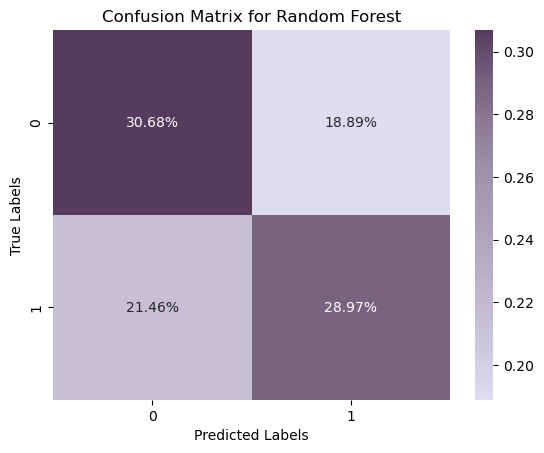

In [36]:
# y_pred has the predicted labels
y_pred_rf = rf_preds.select("prediction").collect()

# y_orig are the actual labels 
y_orig_rf = rf_preds.select("is_contro_idx").collect()

# Creating the confusion matrix 
cm_rf = confusion_matrix(y_orig_rf, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

cm_rf_heatmap = sns.heatmap(cm_rf/np.sum(cm_rf), annot=True, fmt='.2%', cmap=custom_cmap)

# Set title, x-axis label, and y-axis label
cm_rf_heatmap.set_title("Confusion Matrix for Random Forest")
cm_rf_heatmap.set_xlabel("Predicted Labels")
cm_rf_heatmap.set_ylabel("True Labels")

# Save the figure
#plt.savefig("../../plots/rf_model_1_confusion_matrix.png")

# Display the plot
plt.show()

### ROC Curve

23/12/06 18:20:49 WARN DAGScheduler: Broadcasting large task binary with size 6.2 MiB
23/12/06 18:20:58 WARN DAGScheduler: Broadcasting large task binary with size 6.1 MiB


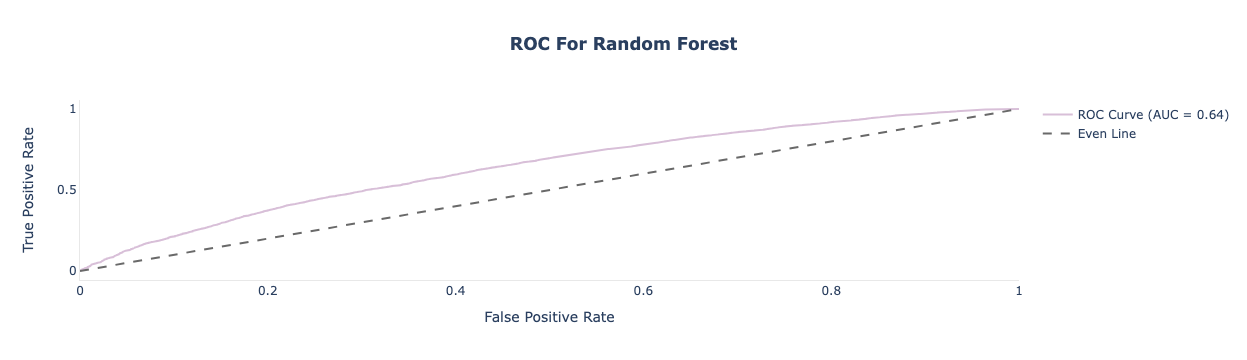

In [37]:
# Obtain the probability column for the positive class (class 1)
rf_probabilities = rf_preds.select("probability").rdd.map(lambda x: x[0][1])

# Convert Spark RDD to a numpy array
y_true = np.array([int(row.is_contro_idx) for row in rf_preds.collect()])
y_scores = np.array(rf_probabilities.collect())

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using Plotly
roc_curve_trace = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC Curve (AUC = {roc_auc:.2f})',
    line=dict(color='#D8BFD8')
)

# Add an even line 
even_line_trace = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(color='#696969', dash='dash'),
    name='Even Line'
)


# Layout of the plot
layout = go.Layout(
    title="<b>ROC For Random Forest</b>",
    title_x=0.5,
    xaxis=dict(title="False Positive Rate"),
    yaxis=dict(title="True Positive Rate"),
)

# Set the background color to white
layout.plot_bgcolor = 'white'

# Add axis lines
layout.xaxis.showline = True
layout.xaxis.linewidth = 1
layout.xaxis.linecolor = '#E8E8E8'
layout.yaxis.showline = True
layout.yaxis.linewidth = 1
layout.yaxis.linecolor = '#E8E8E8'

fig = go.Figure(data=[roc_curve_trace, even_line_trace], layout=layout)

# Save the plot as an HTML file
#fig.write_html("../../plots/rf_model_1_roc.html")

# Display the figure
fig.show()

### Plotting the confusion matrices together

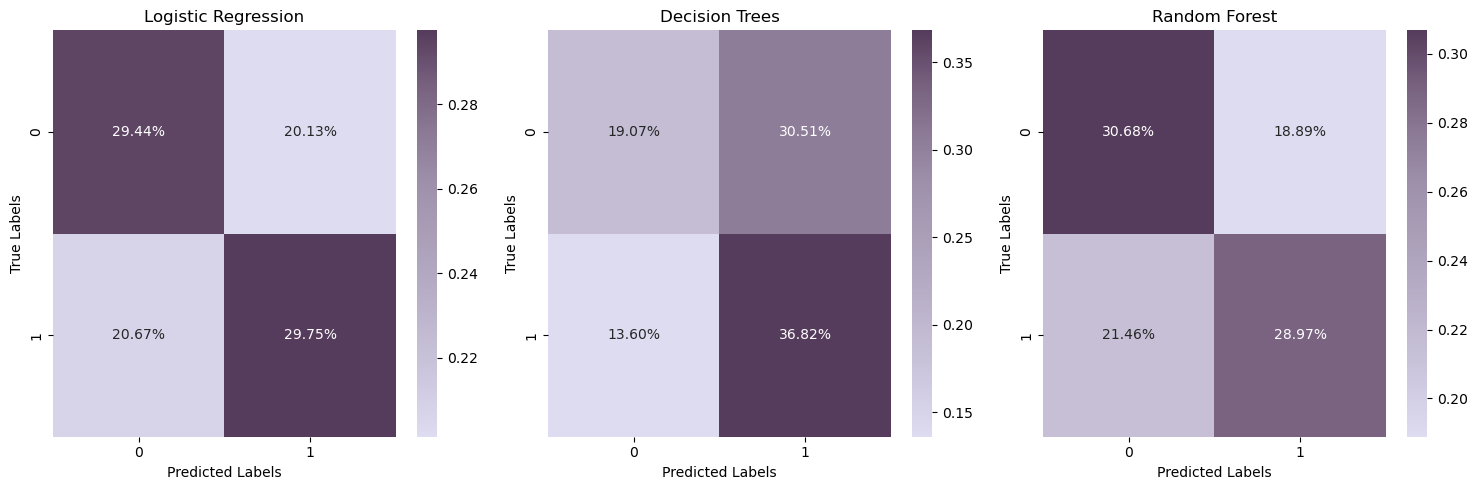

In [85]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the heatmaps
sns.heatmap(cm_lr/np.sum(cm_lr), annot=True, fmt='.2%', cmap=custom_cmap, ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(cm_dt/np.sum(cm_dt), annot=True, fmt='.2%', cmap=custom_cmap, ax=axes[1])
axes[1].set_title('Decision Trees')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

sns.heatmap(cm_rf/np.sum(cm_rf), annot=True, fmt='.2%', cmap=custom_cmap, ax=axes[2])
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

# Adjust layout
plt.tight_layout()

# Save the figure
#plt.savefig("../../plots/ml_model_1_confusion_matrices.png")

# Show the plot
plt.show()

### Plotting the ROC curves together

23/12/06 19:03:42 WARN DAGScheduler: Broadcasting large task binary with size 6.2 MiB
23/12/06 19:03:50 WARN DAGScheduler: Broadcasting large task binary with size 6.1 MiB


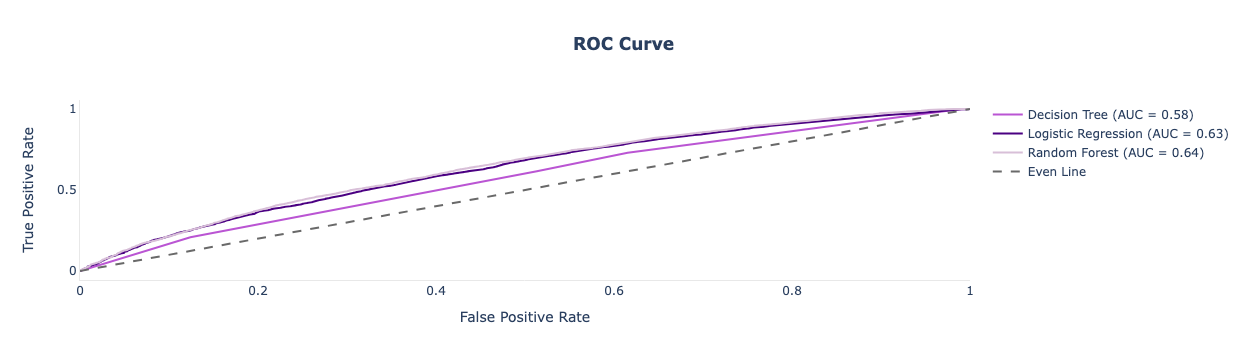

In [86]:
# Define the true labels and predicted probabilities for each model
models = ["Decision Tree", "Logistic Regression", "Random Forest"]
predictions = [dt_preds, lr_preds, rf_preds]
colors = [ '#BA55D3','#4B0082', '#D8BFD8'] 

# Initialize an empty list to store ROC curves 
roc_curves = []

for i, model_name in enumerate(models):
    # Obtain the probability column for the positive class
    probabilities = predictions[i].select("probability").rdd.map(lambda x: x[0][1])

    # Convert Spark RDD to a numpy array
    y_true = np.array([int(row.is_contro_idx) for row in predictions[i].collect()])
    y_scores = np.array(probabilities.collect())

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Create an ROC curve trace for the current model
    roc_curve_trace = go.Scatter(
        x=fpr,
        y=tpr,
        mode='lines',
        name=f'{model_name} (AUC = {roc_auc:.2f})',
        line=dict(color=colors[i])
    )

    roc_curves.append(roc_curve_trace)


# Add an even line
even_line_trace = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(color='#696969', dash='dash'),
    name='Even Line'
)

roc_curves.append(even_line_trace)

# Create a subplot for the ROC curves
layout = go.Layout(
    title="<b>ROC Curve</b>",
    title_x=0.5,
    xaxis=dict(title="False Positive Rate"),
    yaxis=dict(title="True Positive Rate"),
    showlegend=True,
    plot_bgcolor='white'
)

# Add axis lines
layout.xaxis.showline = True
layout.xaxis.linewidth = 1
layout.xaxis.linecolor = '#E8E8E8'
layout.yaxis.showline = True
layout.yaxis.linewidth = 1
layout.yaxis.linecolor = '#E8E8E8'

fig = go.Figure(data=roc_curves, layout=layout)

# Save the plot as an HTML file
fig.write_html("../../plots/ml_model_1_roc.html")
# Display the figure
fig.show()


### Storing the evaluation metrics of every model for comparison

In [46]:
# Create a dictionary to store the results
results_dict = {
    'Model': ['Logistic Regression', 'Decision Trees', 'Random Forest Classifier'],
    'Accuracy': [lr_acc, dt_acc, rf_acc],  
    'Test Error': [1.0 - lr_acc, 1.0 - dt_acc, 1.0 - rf_acc], 
    'F1 Score': [f1_score_lr, f1_score_dt, f1_score_rf], 
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results_dict)

# Display the table
print(results_df)

# Save the csv file
# results_df.to_csv('../../data/csv/ml_model_1_results.csv', index=False)

                      Model  Accuracy  Test Error  F1 Score
0       Logistic Regression  0.631776    0.368224  0.593220
1            Decision Trees  0.485504    0.514496  0.625427
2  Random Forest Classifier  0.642783    0.357217  0.589456


## Feature Importance per model

In [47]:
# Utility function to retrieve feature importance
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    """
    Extracts feature importance from a model and associates it with feature names.

    Parameters:
    - featureImp: Feature importances obtained from the model.
    - dataset: Dataset containing the feature metadata.
    - featuresCol: Name of the column containing the features.

    Returns:
    - DataFrame with feature names and their corresponding importance scores.
    """
    list_extract = []
    
    # Extracting feature metadata from the dataset schema
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    
    # Creating a DataFrame with feature names and indices
    varlist = pd.DataFrame(list_extract)
    
    # Adding feature importance scores based on their indices
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    
    # Sorting the DataFrame by feature importance in descending order
    return varlist.sort_values('score', ascending=False)

In [48]:
# Logistic Regression
feature_importance_lr=ExtractFeatureImp(lr_cv_model.bestModel.stages[-2].coefficients, lr_preds, "final_features")

# Drop unnecessary columns and reset index
feature_importance_lr = (
    feature_importance_lr
    .sort_values(by='score', ascending=False)
    .reset_index(drop=True)
    .drop(columns=['idx'])
)

# Dropping tf-idf features
feature_importance_lr = feature_importance_lr[~feature_importance_lr['name'].str.contains('features')]
feature_importance_lr

name     score
0         emotion_class_vec_fear  0.638183
1      emotion_class_vec_sadness  0.497137
2     emotion_class_vec_surprise  0.321968
13  sentiment_class_vec_negative  0.013672
18                        gilded  0.000000
25  sentiment_class_vec_positive -0.107894

In [49]:
# Decision Trees
feature_importance_dt=ExtractFeatureImp(dt_cv_model.bestModel.stages[-2].featureImportances, dt_preds, "final_features")

# Drop unnecessary columns and reset index
feature_importance_dt = (
    feature_importance_dt
    .sort_values(by='score', ascending=False)
    .reset_index(drop=True)
    .drop(columns=['idx'])
)

# Dropping tf-idf features
feature_importance_dt = feature_importance_dt[~feature_importance_dt['name'].str.contains('features')]
feature_importance_dt

name    score
3         emotion_class_vec_fear  0.11915
20                        gilded  0.00000
22  sentiment_class_vec_positive  0.00000
23  sentiment_class_vec_negative  0.00000
24     emotion_class_vec_sadness  0.00000
25    emotion_class_vec_surprise  0.00000

In [50]:
# Random Forest
feature_importance_rf = ExtractFeatureImp(rf_cv_model.bestModel.stages[-2].featureImportances, rf_preds, "final_features")

# Drop unnecessary columns and reset index
feature_importance_rf = (
    feature_importance_rf
    .sort_values(by='score', ascending=False)
    .reset_index(drop=True)
    .drop(columns=['idx'])
)
# Dropping tf-idf features
feature_importance_rf = feature_importance_rf[~feature_importance_rf['name'].str.contains('features')]
feature_importance_rf

name     score
2         emotion_class_vec_fear  0.065946
11     emotion_class_vec_sadness  0.038187
22  sentiment_class_vec_positive  0.020116
23    emotion_class_vec_surprise  0.016488
24  sentiment_class_vec_negative  0.014439
25                        gilded  0.000047

### Plotting feature importance per model

In [51]:
# Utility function to plot feature importance of a model
def chart_imp_features(imp, model):
    """
    Creates a bar chart to visualize feature importance scores for a given model.

    Parameters:
    - imp: DataFrame containing feature names and their corresponding importance scores.
    - model: Name or type of the model for which feature importance is being visualized.

    Returns:
    - Altair chart representing the feature importance.
    """
    # Extracting feature names and importance scores
    categoryNames = list(imp.name)
    
    # Creating an Altair bar chart
    chart = alt.Chart(imp).mark_bar().encode(
        x=alt.X("score", title='Importance Score'),
        y=alt.Y("name", title='Feature Name', sort=categoryNames)
    ).properties(
        title="Feature Importance in " + model,
        height=300, width=400
    )
    
    return chart

In [52]:
# Logistic Regression
chart_lr= chart_imp_features(feature_importance_lr,'Logistic Regression')
# Set color
chart_lr=chart_lr.mark_bar(color='#dac4e9')

# Save the figure
#chart_lr.save("../../plots/lr_model_1_feature_importance.html", format="html")

# Display the figure
chart_lr

alt.Chart(...)

In [53]:
# Decision Trees
chart_dt= chart_imp_features(feature_importance_dt,'Decision Trees')
# Set color
chart_dt=chart_dt.mark_bar(color='#dac4e9')

# Save the figure
#chart_dt.save("../../plots/dt_model_1_feature_importance.html", format="html")

# Display the figure
chart_dt

alt.Chart(...)

In [54]:
# Random Forest
chart_rf= chart_imp_features(feature_importance_rf,'Random Forest')
# Set color
chart_rf=chart_rf.mark_bar(color='#dac4e9')

# Save the figure
#chart_rf.save("../../plots/rf_model_1_feature_importance.html", format="html")

# Display the figure
chart_rf

alt.Chart(...)

### Plotting feature importance per model together for comparison

In [55]:
# Combine the three charts horizontally
combined_chart_feature = (chart_lr | chart_dt | chart_rf)

# Save the figure
combined_chart_feature.save("../../plots/ml_model_1_feature_importance.html", format="html")

# Display the figure
combined_chart_feature

alt.HConcatChart(...)

## Classification: Predicting Popularity of a Comment
In pursuit of our second machine learning business goal, we embark on a supervised learning journey to predict the popularity of a given comment. This classification task involves training and evaluating various models, focusing on model selection and performance evaluation.

**1. Data Preparation:**
To initiate the prediction task, we will generate the target variable using one of the feature columns related to comment popularity. Ensuring the effectiveness of our models, we will also balance the target variable, if necessary, using downsampling. This approach aims to create a more even distribution of labels for training, enhancing the robustness of our models.

**2. Model Selection:**
We will explore diverse classification models tailored for predicting comment popularity. Models under consideration include Logistic Regression, Decision Trees, and Random Forest. This exploration allows us to leverage the unique strengths of different models and identify the one that best captures the underlying patterns in our dataset.

**3. Evaluation Metrics:**
The success of our models will be assessed using a range of metrics, including accuracy, precision, recall, and F1-score. These metrics provide comprehensive insights into the models' performance, aiding in the selection of the most suitable model for predicting comment popularity.

By iteratively refining our models and focusing on the most effective approaches, we aim to deliver a robust and accurate classification model capable of discerning the popularity levels of comments within the dataset.

In [56]:
# Display the spark dataframe to be used for this business goal
ts_comm.show()

+--------------------+--------------------+---------+-------------+-----+------+----------------+
|              author|            document|sentiment|emotion_class|score|gilded|controversiality|
+--------------------+--------------------+---------+-------------+-----+------+----------------+
|           shambean2|bad blood song ca...| positive|          joy|    7|     0|               0|
|           AdkoSokdA|     speak look good| positive|     surprise|    1|     0|               0|
|      RedPandaLily88|imagine taylor st...| positive|         fear|   10|     0|               0|
|       dzung_long_vn|    justice epiphany| positive|          joy|    6|     0|               0|
|            JToews19|invite anyone sub...| positive|     surprise|    1|     0|               0|
|   Brohamlovesrandom|story taylor real...| positive|          joy|    2|     0|               0|
|      songacronymbot|yntcd refer need ...| positive|      sadness|    1|     0|               0|
|       cruelsummer3

## Generating the target variable
The column score has been provided to us in this dataset. The score is the number of upvotes minus the number of downvotes. Hence, we will use this variable for our label generation.

In [57]:
# Find the 75th percentile of the score column
pop_thresh = ts_comm.agg(F.expr('percentile(score, array(0.5))')[0].alias("50th")).collect()[0][0]
# Feature engineering
ts_comm_pop = ts_comm.withColumn("popularity", 
                                       F.when(
                                           F.col("score") >= pop_thresh, 
                                           1
                                       ).otherwise(
                                           F.when(
                                               F.col("score") < pop_thresh,
                                               0
                                           )
                                       )
                                      )

In [59]:
ts_comm_pop.printSchema()

root
 |-- author: string (nullable = true)
 |-- document: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- emotion_class: string (nullable = true)
 |-- score: long (nullable = true)
 |-- gilded: long (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- popularity: integer (nullable = true)



In [58]:
ts_comm_pop.show()

+--------------------+--------------------+---------+-------------+-----+------+----------------+----------+
|              author|            document|sentiment|emotion_class|score|gilded|controversiality|popularity|
+--------------------+--------------------+---------+-------------+-----+------+----------------+----------+
|           shambean2|bad blood song ca...| positive|          joy|    7|     0|               0|         1|
|           AdkoSokdA|     speak look good| positive|     surprise|    1|     0|               0|         0|
|      RedPandaLily88|imagine taylor st...| positive|         fear|   10|     0|               0|         1|
|       dzung_long_vn|    justice epiphany| positive|          joy|    6|     0|               0|         1|
|            JToews19|invite anyone sub...| positive|     surprise|    1|     0|               0|         0|
|   Brohamlovesrandom|story taylor real...| positive|          joy|    2|     0|               0|         0|
|      songacronymb

## Checking Controversiality Column Distribution
Before proceeding further, it's essential to examine the distribution of values in the "controversiality" column. Even though we are not predicting controversiality this time, it serves as a feature, and our model will learn from it.

Understanding the distribution is crucial, especially if there was a significant imbalance in controversiality in our previous business goal. If the distribution is heavily unbalanced, it might impact the model's ability to learn effectively. This insight will guide us in making informed decisions during the modeling process.

In [60]:
ts_comm_pop.groupBy("controversiality").count().show()

+----------------+-------+
|controversiality|  count|
+----------------+-------+
|               0|1787032|
|               1|  28385|
+----------------+-------+



In [61]:
# Count the number of instances in each class
majority_count_contro = ts_comm_pop.filter(F.col("controversiality") == 0).count()
minority_count_contro = ts_comm_pop.filter(F.col("controversiality") == 1).count()

# Downsample the majority class to match the minority class count
downsampled_majority_contro = ts_comm_pop.filter(F.col("controversiality") == 0).sample(False, minority_count_contro / majority_count_contro, seed=42)

# Combine the downsampled majority class with the minority class
downsampled_ts_pop = downsampled_majority_contro.union(ts_comm_pop.filter(F.col("controversiality") == 1))

# Shuffle the downsampled data to mix the classes
downsampled_ts_pop = downsampled_ts_pop.orderBy('controversiality', F.rand())

# Change label values
downsampled_ts_pop = downsampled_ts_pop.withColumn(
    "controversiality",
    F.when(downsampled_ts_pop["controversiality"] == 0, "No").otherwise("Yes")
)

# Show the counts after downsampling
downsampled_ts_pop.groupBy("controversiality").count().show()

+----------------+-----+
|controversiality|count|
+----------------+-----+
|              No|28504|
|             Yes|28385|
+----------------+-----+



Now lets check if our target variable is balanced or not

In [62]:
downsampled_ts_pop.groupBy("popularity").count().show()

+----------+-----+
|popularity|count|
+----------+-----+
|         1|23599|
|         0|33290|
+----------+-----+



## Balancing the Target Variable through Downsampling
In addressing the imbalance of the target variable ('popularity'), we have opted for the downsampling technique. While downsampling may introduce the drawback of information loss, the substantial size of the dataset allows us to mitigate this concern.

By downsampling the majority class to align with the count of the minority class, we aim to achieve a balanced distribution of labels. This process will result in approximately 47,000 rows, which we deem sufficient for training the model. Despite the inherent trade-off of losing some information, this approach enables us to create a more balanced and representative training set for our classification model.

In [63]:
# Count the number of instances in each class
majority_pop_count = downsampled_ts_pop.filter(F.col("popularity") == 0).count()
minority_pop_count = downsampled_ts_pop.filter(F.col("popularity") == 1).count()

# Downsample the majority class to match the minority class count
downsampled_pop_majority = downsampled_ts_pop.filter(F.col("popularity") == 0).sample(False, minority_pop_count / majority_pop_count, seed=42)

# Combine the downsampled majority class with the minority class
downsampled_pop_df = downsampled_pop_majority.union(downsampled_ts_pop.filter(F.col("popularity") == 1))

# Shuffle the downsampled data to mix the classes
downsampled_pop_df = downsampled_pop_df.orderBy('popularity', F.rand())

# Show the counts after downsampling
downsampled_pop_df.groupBy("popularity").count().show()

+----------+-----+
|popularity|count|
+----------+-----+
|         0|23670|
|         1|23599|
+----------+-----+



In [64]:
print(f'Number of rows in downsampled dataset: {downsampled_pop_df.count()}')

Number of rows in downsampled dataset: 47269


In [65]:
# SANITY CHECK
downsampled_pop_df.printSchema()

root
 |-- author: string (nullable = true)
 |-- document: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- emotion_class: string (nullable = true)
 |-- score: long (nullable = true)
 |-- gilded: long (nullable = true)
 |-- controversiality: string (nullable = false)
 |-- popularity: integer (nullable = true)



## Split the data

In [66]:
# Split the data
train_pop_data, test_pop_data = downsampled_pop_df.randomSplit([0.8, 0.2], seed=42)

## Data Transformation: Preparing for Model Training
In this section, we perform essential transformations on our dataset to prepare it for training classification models. The following key transformations are applied:

**1. Text Data Tokenization and Vectorization:**
We employ a two-step process to convert the textual information in the 'document' column into a format suitable for machine learning models:

Tokenization: Using the Tokenizer module, we split each comment into individual words, creating a list of tokens.
HashingTF and IDF: The tokenized words are then transformed into numerical feature vectors using the HashingTF (Term Frequency) and IDF (Inverse Document Frequency) techniques. This process helps represent the comments in a numerical format while considering the importance of each word.

**2. Encoding Categorical Variables:**
Certain categorical variables ('sentiment', 'emotion_class') are converted into numerical representations using the following techniques:

StringIndexer: Converts categorical labels into indices for 'sentiment', 'emotion_class', and 'controversiality'.
One-Hot Encoding: Transforms the indexed categorical variables into binary vectors to ensure compatibility with machine learning algorithms.

**3. Feature Selection:**
The relevant features for model training are assembled into a single vector using the VectorAssembler module. This includes the transformed text features, one-hot encoded categorical features, and additional features like 'gilded'. The resulting vector, named 'final_features,' serves as the input for our classification models.

**4. Label Conversion:**
Lastly, we use the IndexToString module to convert the predicted indices into human-readable labels. This is particularly useful for interpreting the model outputs in terms of controversiality categories: 'Not Controversial' or 'Controversial.'

By executing these transformations, we create a well-structured and feature-rich dataset, laying the foundation for effective training and evaluation of our classification models.

In [67]:
# Tokenize the 'document' column
tokenizer_new = Tokenizer(inputCol="document", outputCol="words")

# Apply HashingTF to convert words to feature vectors
hashing_tf_new = HashingTF(inputCol="words", outputCol="raw_features", numFeatures=20)

# Apply IDF to the output of HashingTF
idf_new = IDF(inputCol="raw_features", outputCol="features")

# StringIndexer for fitting in our pipeline for all of the string data into indices 
sentiment_indexer_new = StringIndexer(inputCol="sentiment", outputCol="sentiment_index")
emotion_indexer_new = StringIndexer(inputCol="emotion_class", outputCol="emotion_index")
contro_indexer_new = StringIndexer(inputCol="controversiality", outputCol="contro_index")

# One Hot encoding for categorical values having more than 2 categories
onehot_sentiment_new = OneHotEncoder(inputCol="sentiment_index", outputCol="sentiment_class_vec")
onehot_emotion_new = OneHotEncoder(inputCol="emotion_index", outputCol="emotion_class_vec")

# Picking features for models
vectorAssembler_features_new = VectorAssembler(
    inputCols=["features", "sentiment_class_vec","emotion_class_vec",\
               "gilded", "contro_index"], 
    outputCol= "final_features")

# Giving our predicted indices a label
labelConverter_new = IndexToString(inputCol="prediction", 
                               outputCol="predicted_popularity", 
                               labels= ["not_popular", "popular"])

## Model Selection and Cross-Validation Decision
Before proceeding with the modeling phase, it's essential to clarify our approach to model selection and evaluation. We initially opted for cross-validation to ensure robust performance across different subsets of our dataset. However, after conducting several iterations, we observed that each cross-validation run was taking approximately 1 hour, and the resulting improvements in evaluation metrics were marginal.

Given the computational resources and time constraints, we have decided to streamline our approach and focus on running base models. This decision allows us to expedite the modeling process and allocate resources more efficiently. While cross-validation provides valuable insights, the minimal gains observed did not justify the extended runtime in our specific context.

We remain committed to achieving our business goal and believe that a focused effort on base models will still yield meaningful results. As we progress, we will closely monitor model performance and iterate as necessary to meet our objectives.

## Logistic Regression

In [68]:
%%time

# Create LogisticRegression model
lr_new = LogisticRegression(labelCol="popularity", featuresCol="final_features", regParam = 0.01, elasticNetParam = 0.25, maxIter=20)

# Creating a pipeline
pipeline_lr_new = Pipeline(stages=[tokenizer_new, hashing_tf_new, idf_new, sentiment_indexer_new, emotion_indexer_new,\
                               contro_indexer_new,\
                               onehot_sentiment_new, onehot_emotion_new,\
                               vectorAssembler_features_new, \
                               lr_new, labelConverter_new])

# Fit the model
lr_model_new = pipeline_lr_new.fit(train_pop_data)

# Transform test data
lr_preds_new = lr_model_new.transform(test_pop_data)

# Evaluator
lr_evaluator_new = MulticlassClassificationEvaluator(labelCol="popularity", predictionCol="prediction", metricName="accuracy")

# Evaluate the model
# Accuracy
lr_acc_new = lr_evaluator_new.evaluate(lr_preds_new)

lr_preds_new = lr_preds_new.withColumn("popularity", lr_preds_new["popularity"].cast("double"))

tp_lr_new = lr_preds_new.filter((F.col("popularity") == 1) & (F.col("prediction") == 1)).count()
fp_lr_new = lr_preds_new.filter((F.col("popularity") == 0) & (F.col("prediction") == 1)).count()
fn_lr_new = lr_preds_new.filter((F.col("popularity") == 1) & (F.col("prediction") == 0)).count()

# Precision
precision_lr_new = tp_lr_new / (tp_lr_new + fp_lr_new)
# Recall
recall_lr_new = tp_lr_new / (tp_lr_new + fn_lr_new)
# F1 score
f1_score_lr_new = 2 * (precision_lr_new * recall_lr_new) / (precision_lr_new + recall_lr_new)

# Displaying the results
print()
print("===================")
print("Accuracy = %g" % lr_acc_new)
print("Test Error = %g" % (1.0 - lr_acc_new))
print("F1 Score = %g" % f1_score_lr_new)
print("===================")
print()


Accuracy = 0.660367
Test Error = 0.339633
F1 Score = 0.670418

CPU times: user 454 ms, sys: 114 ms, total: 568 ms
Wall time: 3min 26s


### Confusion Matrix

Confusion Matrix:
[[2933 1691]
 [1472 3217]]


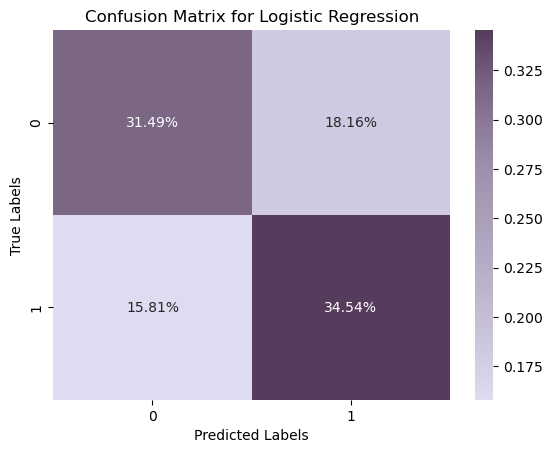

In [69]:
# y_pred has the predicted labels
y_pred_lr_new = lr_preds_new.select("prediction").collect()

# y_orig are the actual labels 
y_orig_lr_new = lr_preds_new.select("popularity").collect()

# Creating the confusion matrix 
cm_lr_new = confusion_matrix(y_orig_lr_new, y_pred_lr_new)
print("Confusion Matrix:")
print(cm_lr_new)


cm_lr_heatmap_new = sns.heatmap(cm_lr_new/np.sum(cm_lr_new), annot=True, fmt='.2%', cmap=custom_cmap)

# Set title, x-axis label, and y-axis label
cm_lr_heatmap_new.set_title("Confusion Matrix for Logistic Regression")
cm_lr_heatmap_new.set_xlabel("Predicted Labels")
cm_lr_heatmap_new.set_ylabel("True Labels")

# Save the figure
#plt.savefig("../../plots/lr_model_2_confusion_matrix.png")

# Display the plot
plt.show()

### ROC Curve

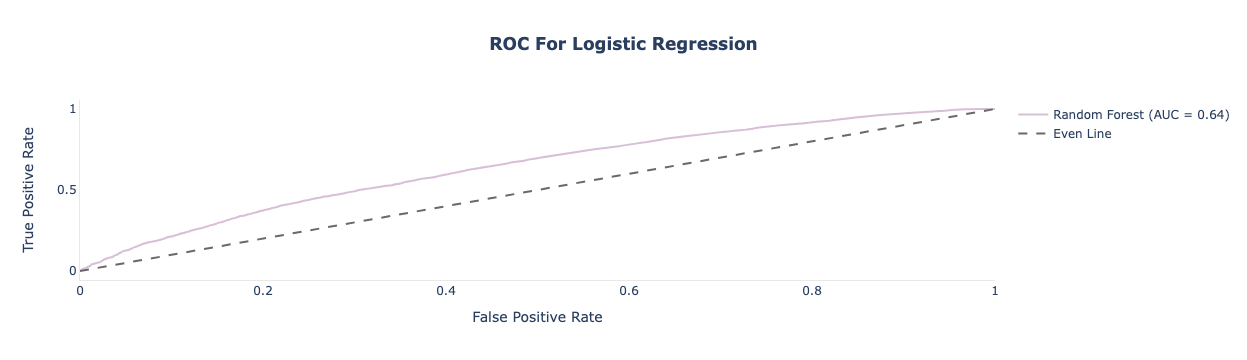

In [70]:
# Obtain the probability column for the positive class 
lr_probabilities_new = lr_preds_new.select("probability").rdd.map(lambda x: x[0][1])

# Convert Spark RDD to a numpy array
y_lr_new_true = np.array([int(row.popularity) for row in lr_preds_new.collect()])
y_lr_new_scores = np.array(lr_probabilities_new.collect())

# Calculate ROC curve
fpr_lr_new, tpr_lr_new, _ = roc_curve(y_lr_new_true, y_lr_new_scores)
roc_auc_lr_new = auc(fpr_lr_new, tpr_lr_new)

# Plot ROC curve 
roc_curve_trace_lr_new = go.Scatter(
    x=fpr_lr_new,
    y=tpr_lr_new,
    mode='lines',
    line=dict(color='#BA55D3')
)

# Add an even line 
even_line_trace = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(color='#696969', dash='dash'),
    name='Even Line'
)

# Layout of the figure
layout = go.Layout(
    title="<b>ROC For Logistic Regression</b>",
    title_x=0.5,
    xaxis=dict(title="False Positive Rate"),
    yaxis=dict(title="True Positive Rate"),
)

# Set the background color to white
layout.plot_bgcolor = 'white'

# Add axis lines
layout.xaxis.showline = True
layout.xaxis.linewidth = 1
layout.xaxis.linecolor = '#E8E8E8'
layout.yaxis.showline = True
layout.yaxis.linewidth = 1
layout.yaxis.linecolor = '#E8E8E8'

fig = go.Figure(data=[roc_curve_trace, even_line_trace], layout=layout)

# Save the plot as an HTML file
#fig.write_html("../../plots/lr_model_2_roc.html")

# Display the figure
fig.show()

## Decision Trees

In [71]:
%%time

# Intialising decision tree classifier
dt_new = DecisionTreeClassifier(labelCol="popularity", featuresCol="final_features",  maxDepth = 3, maxBins = 20, impurity = 'gini')

# Creating a pipeline
pipeline_dt_new = Pipeline(stages=[tokenizer_new, hashing_tf_new, idf_new, sentiment_indexer_new, emotion_indexer_new,\
                               contro_indexer_new,\
                               onehot_sentiment_new, onehot_emotion_new,\
                               vectorAssembler_features_new, \
                               dt_new, labelConverter_new])

dt_model_new = pipeline_dt_new.fit(train_pop_data)

# Use test set here so we can measure the accuracy of our model on new data
dt_preds_new = dt_model_new.transform(test_pop_data)

dt_evaluator_new = MulticlassClassificationEvaluator(labelCol="popularity", predictionCol="prediction", metricName="accuracy")

# Evaluate the model
# Accuracy
dt_acc_new = dt_evaluator_new.evaluate(dt_preds_new)

dt_preds_new = dt_preds_new.withColumn("popularity", dt_preds_new["popularity"].cast("double"))
tp_dt_new = dt_preds_new.filter((F.col("popularity") == 1) & (F.col("prediction") == 1)).count()
fp_dt_new = dt_preds_new.filter((F.col("popularity") == 0) & (F.col("prediction") == 1)).count()
fn_dt_new = dt_preds_new.filter((F.col("popularity") == 1) & (F.col("prediction") == 0)).count()

# Precision
precision_dt_new = tp_dt_new / (tp_dt_new + fp_dt_new)
# Recall
recall_dt_new = tp_dt_new / (tp_dt_new + fn_dt_new)
# Calculate F1 score
f1_score_dt_new = 2 * (precision_dt_new * recall_dt_new) / (precision_dt_new + recall_dt_new)

# Displaying the results
print()
print("===================")
print("Accuracy = %g" % dt_acc_new)
print("Test Error = %g" % (1.0 - dt_acc_new))
print("F1 Score = %g" % f1_score_dt_new)
print("===================")
print()


Accuracy = 0.660797
Test Error = 0.339203
F1 Score = 0.669595

CPU times: user 420 ms, sys: 103 ms, total: 524 ms
Wall time: 3min 7s


### Confusion Matrix

Confusion Matrix:
[[2953 1671]
 [1488 3201]]


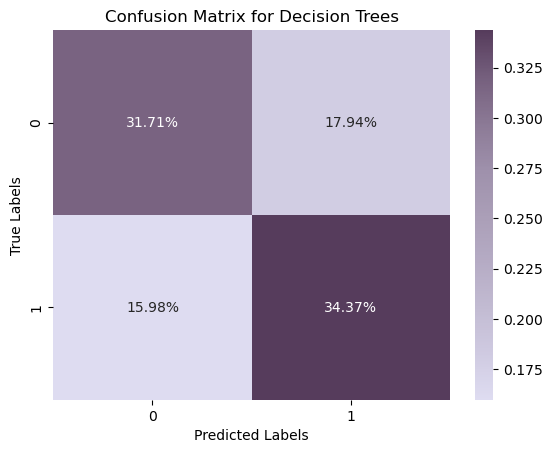

In [72]:
# y_pred has the predicted labels
y_pred_dt_new = dt_preds_new.select("prediction").collect()

# y_orig are the actual labels 
y_orig_dt_new = dt_preds_new.select("popularity").collect()

# Creating the confusion matrix 
cm_dt_new = confusion_matrix(y_orig_dt_new, y_pred_dt_new)
print("Confusion Matrix:")
print(cm_dt_new)

cm_dt_heatmap_new = sns.heatmap(cm_dt_new/np.sum(cm_dt_new), annot=True, fmt='.2%', cmap=custom_cmap)

# Set title, x-axis label, and y-axis label
cm_dt_heatmap_new.set_title("Confusion Matrix for Decision Trees")
cm_dt_heatmap_new.set_xlabel("Predicted Labels")
cm_dt_heatmap_new.set_ylabel("True Labels")

# Save the figure
#plt.savefig("../../plots/dt_model_2_confusion_matrix.png")

# Display the plot
plt.show()

### ROC Curve

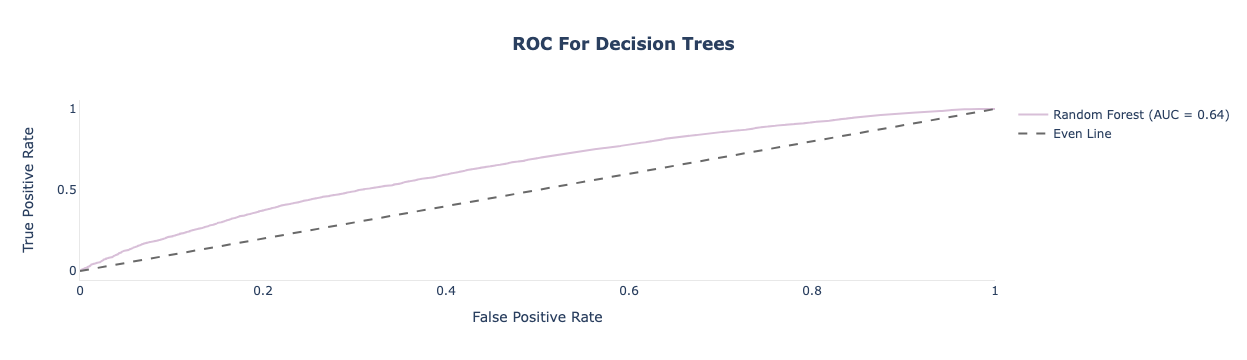

In [73]:
# Obtain the probability column for the positive class 
dt_probabilities_new = dt_preds_new.select("probability").rdd.map(lambda x: x[0][1])

# Convert Spark RDD to a numpy array
y_dt_new_true = np.array([int(row.popularity) for row in dt_preds_new.collect()])
y_dt_new_scores = np.array(dt_probabilities_new.collect())

# Calculate ROC curve
fpr_dt_new, tpr_dt_new, _ = roc_curve(y_dt_new_true, y_dt_new_scores)
roc_auc_dt_new = auc(fpr_dt_new, tpr_dt_new)

# Plot ROC curve 
roc_curve_trace_dt_new = go.Scatter(
    x=fpr_dt_new,
    y=tpr_dt_new,
    mode='lines',
    line=dict(color='#4B0082')
)

# Add an even line 
even_line_trace = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(color='#696969', dash='dash'),
    name='Even Line'
)


# Layout of the figure
layout = go.Layout(
    title="<b>ROC For Decision Trees</b>",
    title_x=0.5,
    xaxis=dict(title="False Positive Rate"),
    yaxis=dict(title="True Positive Rate"),
)

# Set the background color to white
layout.plot_bgcolor = 'white'

# Add axis lines
layout.xaxis.showline = True
layout.xaxis.linewidth = 1
layout.xaxis.linecolor = '#E8E8E8'
layout.yaxis.showline = True
layout.yaxis.linewidth = 1
layout.yaxis.linecolor = '#E8E8E8'

fig = go.Figure(data=[roc_curve_trace, even_line_trace], layout=layout)

# Save the plot as an HTML file
#fig.write_html("../../plots/dt_model_2_roc.html")

# Display the figure
fig.show()

## Random Forest

In [74]:
%%time

# Intialising random forest classifier
rf_new = RandomForestClassifier(labelCol="popularity", featuresCol="final_features", maxDepth = 10, numTrees = 50, featureSubsetStrategy = 'auto')

# Creating a pipeline
pipeline_rf_new = Pipeline(stages=[tokenizer_new, hashing_tf_new, idf_new, sentiment_indexer_new, emotion_indexer_new,\
                               contro_indexer_new,\
                               onehot_sentiment_new, onehot_emotion_new,\
                               vectorAssembler_features_new, \
                               rf_new, labelConverter_new])

# Fit the model
rf_model_new = pipeline_rf_new.fit(train_pop_data)

# Transform test data
rf_preds_new = rf_model_new.transform(test_pop_data)

# Evaluator
rf_evaluator_new = MulticlassClassificationEvaluator(labelCol="popularity", predictionCol="prediction", metricName="accuracy")

# Evaluate the model
# Accuracy
rf_acc_new = rf_evaluator_new.evaluate(rf_preds_new)

rf_preds_new = rf_preds_new.withColumn("popularity", rf_preds_new["popularity"].cast("double"))

tp_rf_new = rf_preds_new.filter((F.col("popularity") == 1) & (F.col("prediction") == 1)).count()
fp_rf_new = rf_preds_new.filter((F.col("popularity") == 0) & (F.col("prediction") == 1)).count()
fn_rf_new = rf_preds_new.filter((F.col("popularity") == 1) & (F.col("prediction") == 0)).count()

# Precision
precision_rf_new = tp_rf_new / (tp_rf_new + fp_rf_new)
# Recall
recall_rf_new = tp_rf_new / (tp_rf_new + fn_rf_new)
# F1 score
f1_score_rf_new = 2 * (precision_rf_new * recall_rf_new) / (precision_rf_new + recall_rf_new)

# Displaying the results
print()
print("===================")
print("Accuracy = %g" % rf_acc_new)
print("Test Error = %g" % (1.0 - rf_acc_new))
print("F1 Score = %g" % f1_score_rf_new)
print("===================")
print()

23/12/06 18:41:37 WARN DAGScheduler: Broadcasting large task binary with size 1449.1 KiB
23/12/06 18:41:38 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
23/12/06 18:41:40 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
23/12/06 18:42:30 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/12/06 18:42:46 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/12/06 18:43:03 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/12/06 18:43:19 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB



Accuracy = 0.663911
Test Error = 0.336089
F1 Score = 0.672389

CPU times: user 505 ms, sys: 114 ms, total: 619 ms
Wall time: 3min 38s


### Confusion Matrix

23/12/06 18:43:37 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


Confusion Matrix:
[[2971 1653]
 [1477 3212]]


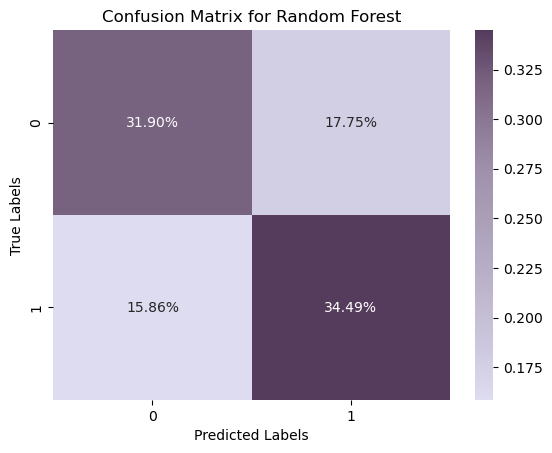

In [75]:
# y_pred has the predicted labels
y_pred_rf_new = rf_preds_new.select("prediction").collect()

# y_orig are the actual labels 
y_orig_rf_new = rf_preds_new.select("popularity").collect()

# Creating the confusion matrix 
cm_rf_new = confusion_matrix(y_orig_rf_new, y_pred_rf_new)
print("Confusion Matrix:")
print(cm_rf_new)

cm_rf_heatmap_new = sns.heatmap(cm_rf_new/np.sum(cm_rf_new), annot=True, fmt='.2%', cmap=custom_cmap)

# Set title, x-axis label, and y-axis label
cm_rf_heatmap_new.set_title("Confusion Matrix for Random Forest")
cm_rf_heatmap_new.set_xlabel("Predicted Labels")
cm_rf_heatmap_new.set_ylabel("True Labels")

# Save the figure
#plt.savefig("../../plots/rf_model_2_confusion_matrix.png")

# Display the plot
plt.show()

### ROC Curve

23/12/06 18:44:28 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/12/06 18:44:31 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


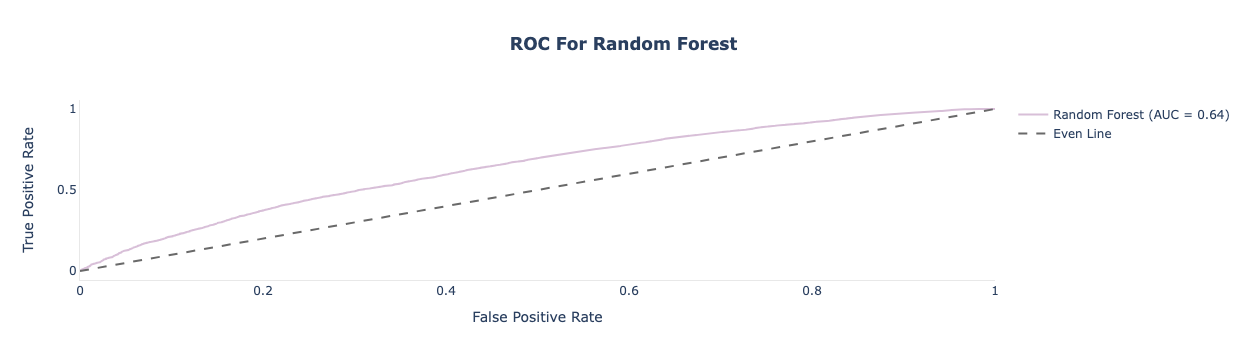

In [76]:
# Obtain the probability column for the positive class 
rf_probabilities_new = rf_preds_new.select("probability").rdd.map(lambda x: x[0][1])

# Convert Spark RDD to a numpy array
y_rf_new_true = np.array([int(row.popularity) for row in rf_preds_new.collect()])
y_rf_new_scores = np.array(rf_probabilities_new.collect())

# Calculate ROC curve
fpr_rf_new, tpr_rf_new, _ = roc_curve(y_rf_new_true, y_rf_new_scores)
roc_auc_rf_new = auc(fpr_rf_new, tpr_rf_new)

# Plot ROC curve 
roc_curve_trace_rf_new = go.Scatter(
    x=fpr_rf_new,
    y=tpr_rf_new,
    mode='lines',
    line=dict(color='#D8BFD8')
)

# Add an even line 
even_line_trace = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(color='#696969', dash='dash'),
    name='Even Line'
)


# Layout of the figure
layout = go.Layout(
    title="<b>ROC For Random Forest</b>",
    title_x=0.5,
    xaxis=dict(title="False Positive Rate"),
    yaxis=dict(title="True Positive Rate"),
)

# Set the background color to white
layout.plot_bgcolor = 'white'

# Add axis lines
layout.xaxis.showline = True
layout.xaxis.linewidth = 1
layout.xaxis.linecolor = '#E8E8E8'
layout.yaxis.showline = True
layout.yaxis.linewidth = 1
layout.yaxis.linecolor = '#E8E8E8'


fig = go.Figure(data=[roc_curve_trace, even_line_trace], layout=layout)

# Save the plot as an HTML file
#fig.write_html("../../plots/rf_model_2_roc.html")

# Display the figure
fig.show()

### Plotting confusion matrices together

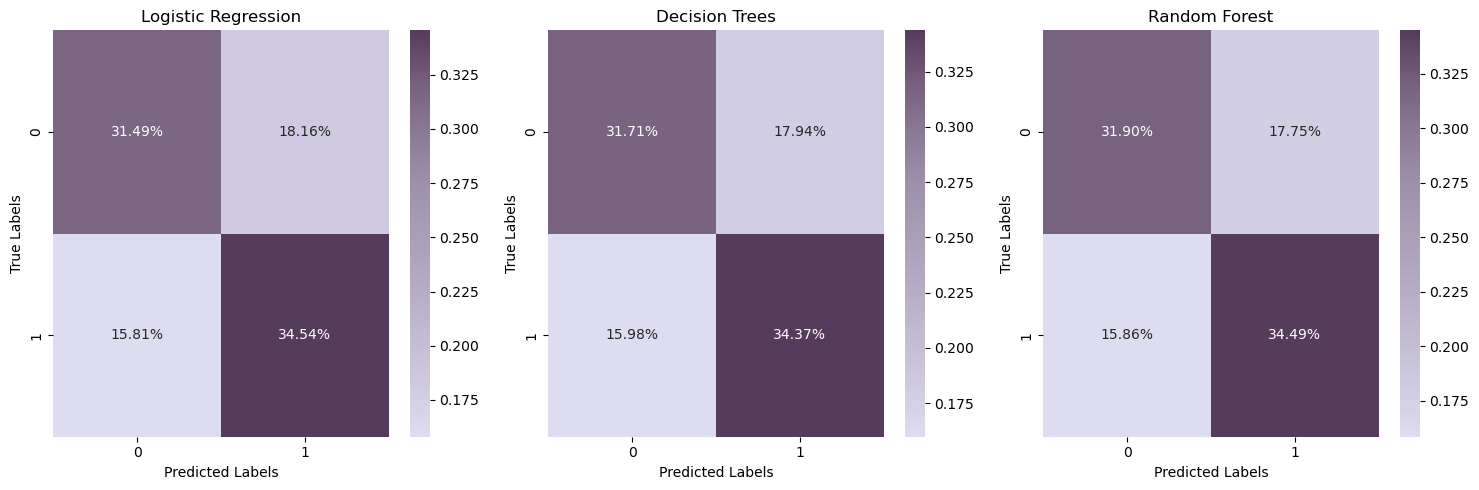

In [77]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the heatmaps
sns.heatmap(cm_lr_new/np.sum(cm_lr_new), annot=True, fmt='.2%', cmap=custom_cmap, ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(cm_dt_new/np.sum(cm_dt_new), annot=True, fmt='.2%', cmap=custom_cmap, ax=axes[1])
axes[1].set_title('Decision Trees')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

sns.heatmap(cm_rf_new/np.sum(cm_rf_new), annot=True, fmt='.2%', cmap=custom_cmap, ax=axes[2])
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

# Adjust layout
plt.tight_layout()

# Save the figure
#plt.savefig("../../plots/ml_model_2_confusion_matrices.png")

# Show the plot
plt.show()

### Plotting ROC curves together

23/12/06 18:58:31 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/12/06 18:58:34 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


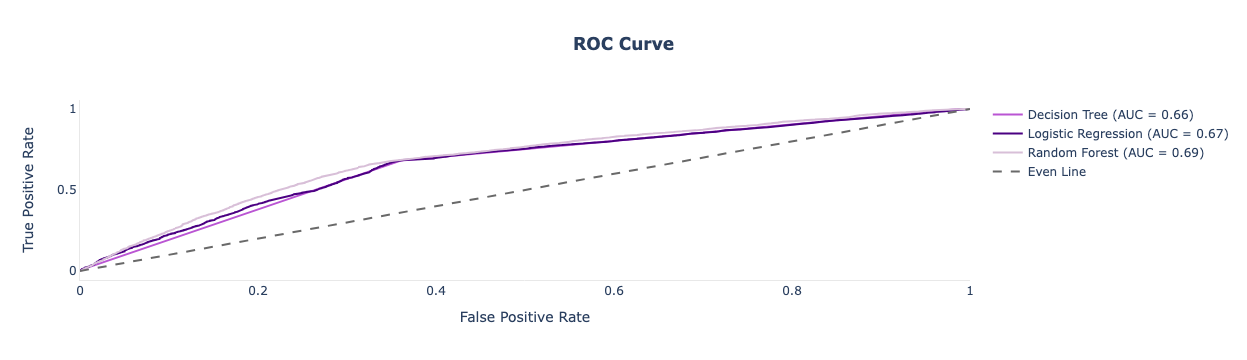

In [83]:
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics import roc_curve, auc

# Define the true labels and predicted probabilities for each model
models = ["Decision Tree", "Logistic Regression", "Random Forest"]
predictions = [dt_preds_new, lr_preds_new, rf_preds_new]
colors = ['#BA55D3', '#4B0082', '#D8BFD8']

# Initialize an empty list to store ROC curves
roc_curves = []

for i, model_name in enumerate(models):
    # Obtain the probability column for the positive class
    probabilities = predictions[i].select("probability").rdd.map(lambda x: x[0][1])

    # Convert Spark RDD to a numpy array
    y_true = np.array([int(row.popularity) for row in predictions[i].collect()])
    y_scores = np.array(probabilities.collect())

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Create an ROC curve trace for the current model
    roc_curve_trace = go.Scatter(
        x=fpr,
        y=tpr,
        mode='lines',
        name=f'{model_name} (AUC = {roc_auc:.2f})',
        line=dict(color=colors[i])
    )

    roc_curves.append(roc_curve_trace)

# Add an even line
even_line_trace = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(color='#696969', dash='dash'),
    name='Even Line'
)

roc_curves.append(even_line_trace)

# Create a subplot for the ROC curves
layout = go.Layout(
    title="<b>ROC Curve</b>",
    title_x=0.5,
    xaxis=dict(title="False Positive Rate"),
    yaxis=dict(title="True Positive Rate"),
    showlegend=True,
    plot_bgcolor='white'
)

# Add axis lines
layout.xaxis.showline = True
layout.xaxis.linewidth = 1
layout.xaxis.linecolor = '#E8E8E8'
layout.yaxis.showline = True
layout.yaxis.linewidth = 1
layout.yaxis.linecolor = '#E8E8E8'

fig = go.Figure(data=roc_curves, layout=layout)

# Save the plot as an HTML file
fig.write_html("../../plots/ml_model_2_roc.html")
# Display the figure
fig.show()


In [88]:
### Storing the evaluation metrics of every model for comparison

In [87]:
# Create a dictionary to store the results
results_dict_new = {
    'Model': ['Logistic Regression', 'Decision Trees', 'Random Forest Classifier'],
    'Accuracy': [lr_acc_new, dt_acc_new, rf_acc_new],  
    'Test Error': [1.0 - lr_acc_new, 1.0 - dt_acc_new, 1.0 - rf_acc_new], 
    'F1 Score': [f1_score_lr_new, f1_score_dt_new, f1_score_rf_new], 
}

# Create a DataFrame from the dictionary
results_df_new = pd.DataFrame(results_dict_new)

# Save the csv file
# results_df_new.to_csv('../../data/csv/ml_model_2_results.csv', index=False)

results_df_new

Model  Accuracy  Test Error  F1 Score
0       Logistic Regression  0.660367    0.339633  0.670418
1            Decision Trees  0.660797    0.339203  0.669595
2  Random Forest Classifier  0.663911    0.336089  0.672389

### Feature Importance per model

In [91]:
# Logistic Regression
feature_importance_lr_new=ExtractFeatureImp(lr_model_new.stages[-2].coefficients, lr_preds_new, "final_features")

# Drop unnecessary columns and reset index
feature_importance_lr_new = (
    feature_importance_lr_new
    .sort_values(by='score', ascending=False)
    .reset_index(drop=True)
    .drop(columns=['idx', 'vals'])
)

# Dropping tf-idf features
feature_importance_lr_new = feature_importance_lr_new[~feature_importance_lr_new['name'].str.contains('features')]
feature_importance_lr_new = feature_importance_lr_new[~feature_importance_lr_new['name'].str.contains('contro_index')]

feature_importance_lr_new

name     score
0                         gilded  0.969253
12  sentiment_class_vec_negative  0.001188
13    emotion_class_vec_surprise  0.000541
15     emotion_class_vec_sadness  0.000000
17        emotion_class_vec_fear  0.000000
19  sentiment_class_vec_positive  0.000000

In [94]:
# Decision Trees
feature_importance_dt_new=ExtractFeatureImp(dt_model_new.stages[-2].featureImportances, dt_preds_new, "final_features")

# Drop unnecessary columns and reset index
feature_importance_dt_new = (
    feature_importance_dt_new
    .sort_values(by='score', ascending=False)
    .reset_index(drop=True)
    .drop(columns=['idx', 'vals'])
)

# Dropping tf-idf features
feature_importance_dt_new = feature_importance_dt_new[~feature_importance_dt_new['name'].str.contains('features')]
feature_importance_dt_new = feature_importance_dt_new[~feature_importance_dt_new['name'].str.contains('contro_index')]

feature_importance_dt_new

name  score
21                        gilded    0.0
22  sentiment_class_vec_positive    0.0
23  sentiment_class_vec_negative    0.0
24        emotion_class_vec_fear    0.0
25     emotion_class_vec_sadness    0.0
26    emotion_class_vec_surprise    0.0

In [95]:
# Random Forest
feature_importance_rf_new=ExtractFeatureImp(rf_model_new.stages[-2].featureImportances, rf_preds_new, "final_features")

# Drop unnecessary columns and reset index
feature_importance_rf_new = (
    feature_importance_rf_new
    .sort_values(by='score', ascending=False)
    .reset_index(drop=True)
    .drop(columns=['idx', 'vals'])
)

# Dropping tf-idf features
feature_importance_rf_new = feature_importance_rf_new[~feature_importance_rf_new['name'].str.contains('features')]
feature_importance_rf_new = feature_importance_rf_new[~feature_importance_rf_new['name'].str.contains('contro_index')]

feature_importance_rf_new

name     score
21        emotion_class_vec_fear  0.005147
22  sentiment_class_vec_positive  0.003982
23     emotion_class_vec_sadness  0.003392
24  sentiment_class_vec_negative  0.003191
25    emotion_class_vec_surprise  0.002881
26                        gilded  0.000235

### Plotting feature importance

In [96]:
# Logistic Regression
chart_lr_new= chart_imp_features(feature_importance_lr_new,'Logistic Regression')
# Set color
chart_lr_new=chart_lr_new.mark_bar(color='#dac4e9')

# Save the figure
#chart_lr_new.save("../../plots/lr_model_2_feature_importance.html", format="html")

# Display the figure
chart_lr_new

alt.Chart(...)

In [97]:
# Decision Trees
chart_dt_new= chart_imp_features(feature_importance_dt_new,'Decision Trees')
# Set color
chart_dt_new=chart_dt_new.mark_bar(color='#dac4e9')

# Save the figure
#chart_dt_new.save("../../plots/dt_model_2_feature_importance.html", format="html")

# Display the figure
chart_dt_new

alt.Chart(...)

In [98]:
# Random Forest
chart_rf_new= chart_imp_features(feature_importance_rf_new,'Random Forest')
# Set color
chart_rf_new=chart_rf_new.mark_bar(color='#dac4e9')

# Save the figure
#chart_rf_new.save("../../plots/rf_model_2_feature_importance.html", format="html")

# Display the figure
chart_rf_new

alt.Chart(...)

### Plotting feature importance per model for comparison

In [99]:
# Combine the three charts horizontally
combined_chart_feature_new = (chart_lr_new | chart_dt_new | chart_rf_new)
# Save the chart
combined_chart_feature_new.save("../../plots/ml_model_2_feature_importance.html", format="html")
# Display the figure
combined_chart_feature_new

alt.HConcatChart(...)